In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import datetime
from datetime import timedelta

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib import pyplot
from matplotlib.gridspec import GridSpec
import matplotlib.font_manager as fm
import seaborn as sns
from scipy import stats

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

for key in plt.rcParamsDefault.keys():
    if 'font' in key:
        print('{}: {}'.format(key,plt.rcParamsDefault[key]))
        
font_path = 'C:/Windows/Fonts/malgunbd.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name
plt.rcParams['font.size'] = 12

font.cursive: ['Apple Chancery', 'Textile', 'Zapf Chancery', 'Sand', 'Script MT', 'Felipa', 'cursive']
font.family: ['sans-serif']
font.fantasy: ['Comic Sans MS', 'Chicago', 'Charcoal', 'Impact', 'Western', 'Humor Sans', 'xkcd', 'fantasy']
font.monospace: ['DejaVu Sans Mono', 'Bitstream Vera Sans Mono', 'Computer Modern Typewriter', 'Andale Mono', 'Nimbus Mono L', 'Courier New', 'Courier', 'Fixed', 'Terminal', 'monospace']
font.sans-serif: ['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']
font.serif: ['DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']
font.size: 10.0
font.stretch: normal
font.style: normal
font.variant: normal
font.weight: normal
legend.fontsize: medium
legend.title_fontsize:

In [2]:
df = pd.read_csv('s1_robot_clear_torque.csv',sep='\t',encoding='utf-8')
df.head()

MSR_DT  SHOP_CD  BOOTH_ID  ZONE_ID  ROBOT_ID  TORQUE01  \
0  2020-02-05 06:18:00.0  KV121PA         1        3        11         0   
1  2020-02-05 06:17:59.0  KV121PA         1        3        11         0   
2  2020-02-05 06:17:58.0  KV121PA         1        3        11         0   
3  2020-02-04 17:44:46.0  KV121PA         1        3        11        -2   
4  2020-02-04 17:44:45.0  KV121PA         1        3        11        -4   

   TORQUE02  TORQUE03  TORQUE04  TORQUE05  TORQUE06      JOB_NM  LINE_NO  \
0        44       -47        19       -17       -11   OP-MAINTE       11   
1        45       -48        16       -16        -9   OP-MAINTE       11   
2         0         0         1        -1         0   OP-MAINTE       11   
3        96        -7        43         6       -52  YBCUV-CL2A       83   
4        56       -19       -12        41        50  YBCUV-CL2A       80   

   STEP_NO                INST_DT  
0        2  2020-02-05 06:19:50.0  
1        2  2020-02-05 06:19:50.0  
2        2  2020-02-05 06:19:47.0  
3       52  2020-02-04 17:46:36.0  
4       50  2020-02-04 17:46:35.0

In [3]:
df.columns

Index(['MSR_DT', 'SHOP_CD', 'BOOTH_ID', 'ZONE_ID', 'ROBOT_ID', 'TORQUE01',
       'TORQUE02', 'TORQUE03', 'TORQUE04', 'TORQUE05', 'TORQUE06', 'JOB_NM',
       'LINE_NO', 'STEP_NO', 'INST_DT'],
      dtype='object')

In [4]:
df.columns = ['msr_dt','shop_cd','booth_id','zone_id','robot_id',
              'tq1','tq2','tq3','tq4','tq5','tq6','job_nm','line_no','step_no','inst_dt']

In [5]:
df.head()

msr_dt  shop_cd  booth_id  zone_id  robot_id  tq1  tq2  tq3  \
0  2020-02-05 06:18:00.0  KV121PA         1        3        11    0   44  -47   
1  2020-02-05 06:17:59.0  KV121PA         1        3        11    0   45  -48   
2  2020-02-05 06:17:58.0  KV121PA         1        3        11    0    0    0   
3  2020-02-04 17:44:46.0  KV121PA         1        3        11   -2   96   -7   
4  2020-02-04 17:44:45.0  KV121PA         1        3        11   -4   56  -19   

   tq4  tq5  tq6      job_nm  line_no  step_no                inst_dt  
0   19  -17  -11   OP-MAINTE       11        2  2020-02-05 06:19:50.0  
1   16  -16   -9   OP-MAINTE       11        2  2020-02-05 06:19:50.0  
2    1   -1    0   OP-MAINTE       11        2  2020-02-05 06:19:47.0  
3   43    6  -52  YBCUV-CL2A       83       52  2020-02-04 17:46:36.0  
4  -12   41   50  YBCUV-CL2A       80       50  2020-02-04 17:46:35.0

In [6]:
df.shape

(59938, 15)

In [7]:
df['job_nm'].unique()

array(['OP-MAINTE', 'YBCUV-CL2A', 'MASTER', 'YB-CL2A', 'PASS', 'B-MAINTE',
       'INIT', 'HOME', 'R-MAINTE', 'CUV-HOOD-FF-H', 'YB-HOOD-FF-H',
       'G-MAINTE', 'YB-DOOR-H'], dtype=object)

In [8]:
df_job = df[df['job_nm'] != 'OP-MAINTE'].copy()
df_job = df_job[df_job['job_nm'] != 'MASTER']
df_job = df_job[df_job['job_nm'] != 'PASS']
df_job = df_job[df_job['job_nm'] != 'B-MAINTE']
df_job = df_job[df_job['job_nm'] != 'INIT']
df_job = df_job[df_job['job_nm'] != 'HOME']
df_job = df_job[df_job['job_nm'] != 'R-MAINTE']
df_job = df_job[df_job['job_nm'] != 'G-MAINTE']

In [9]:
print(df_job.shape)
df_job.head()

(31765, 15)


msr_dt  shop_cd  booth_id  zone_id  robot_id  tq1  tq2  tq3  \
3  2020-02-04 17:44:46.0  KV121PA         1        3        11   -2   96   -7   
4  2020-02-04 17:44:45.0  KV121PA         1        3        11   -4   56  -19   
5  2020-02-04 17:44:44.0  KV121PA         1        3        11   -5   42  -53   
6  2020-02-04 17:44:43.0  KV121PA         1        3        11   -6   39  -25   
7  2020-02-04 17:44:42.0  KV121PA         1        3        11    4   39  -53   

   tq4  tq5  tq6      job_nm  line_no  step_no                inst_dt  
3   43    6  -52  YBCUV-CL2A       83       52  2020-02-04 17:46:36.0  
4  -12   41   50  YBCUV-CL2A       80       50  2020-02-04 17:46:35.0  
5  -33   38   29  YBCUV-CL2A       78       49  2020-02-04 17:46:33.0  
6   51  -24  -37  YBCUV-CL2A       76       48  2020-02-04 17:46:33.0  
7   48  -10   -8  YBCUV-CL2A       73       46  2020-02-04 17:46:33.0

In [10]:
df_job['job_nm'].unique()

array(['YBCUV-CL2A', 'YB-CL2A', 'CUV-HOOD-FF-H', 'YB-HOOD-FF-H',
       'YB-DOOR-H'], dtype=object)

In [11]:
df_yb = df_job[df_job['job_nm'] != 'YBCUV-CL2A'].copy()
df_yb = df_yb[df_yb['job_nm'] != 'CUV-HOOD-FF-H']
df_yb = df_yb[df_yb['job_nm'] != 'YB-HOOD-FF-H']
df_yb = df_yb[df_yb['job_nm'] != 'YB-DOOR-H']
df_yb = df_yb.reset_index(drop=True)

df_cuv = df_job[df_job['job_nm'] != 'YB-CL2A'].copy()
df_cuv = df_cuv[df_cuv['job_nm'] != 'CUV-HOOD-FF-H']
df_cuv = df_cuv[df_cuv['job_nm'] != 'YB-HOOD-FF-H']
df_cuv = df_cuv[df_cuv['job_nm'] != 'YB-DOOR-H']
df_cuv = df_cuv.reset_index(drop=True)

In [12]:
print(df_yb.shape)
df_yb.head()

(13511, 15)


msr_dt  shop_cd  booth_id  zone_id  robot_id  tq1  tq2  tq3  \
0  2020-02-04 15:33:53.0  KV121PA         1        3        11   24   27   32   
1  2020-02-04 15:33:52.0  KV121PA         1        3        11   -4   45  -29   
2  2020-02-04 15:33:51.0  KV121PA         1        3        11    6   45  -52   
3  2020-02-04 15:33:50.0  KV121PA         1        3        11   10   69  -32   
4  2020-02-04 15:33:49.0  KV121PA         1        3        11    2   78   -6   

   tq4  tq5  tq6   job_nm  line_no  step_no                inst_dt  
0  -47    3   46  YB-CL2A      165      111  2020-02-04 15:35:42.0  
1   52  -28   24  YB-CL2A      160      109  2020-02-04 15:35:41.0  
2   10  -17  -30  YB-CL2A      157      106  2020-02-04 15:35:40.0  
3   56  -36   31  YB-CL2A      152      102  2020-02-04 15:35:39.0  
4   14  -34   -5  YB-CL2A      149       99  2020-02-04 15:35:38.0

In [13]:
print(df_cuv.shape)
df_cuv.head()

(18136, 15)


msr_dt  shop_cd  booth_id  zone_id  robot_id  tq1  tq2  tq3  \
0  2020-02-04 17:44:46.0  KV121PA         1        3        11   -2   96   -7   
1  2020-02-04 17:44:45.0  KV121PA         1        3        11   -4   56  -19   
2  2020-02-04 17:44:44.0  KV121PA         1        3        11   -5   42  -53   
3  2020-02-04 17:44:43.0  KV121PA         1        3        11   -6   39  -25   
4  2020-02-04 17:44:42.0  KV121PA         1        3        11    4   39  -53   

   tq4  tq5  tq6      job_nm  line_no  step_no                inst_dt  
0   43    6  -52  YBCUV-CL2A       83       52  2020-02-04 17:46:36.0  
1  -12   41   50  YBCUV-CL2A       80       50  2020-02-04 17:46:35.0  
2  -33   38   29  YBCUV-CL2A       78       49  2020-02-04 17:46:33.0  
3   51  -24  -37  YBCUV-CL2A       76       48  2020-02-04 17:46:33.0  
4   48  -10   -8  YBCUV-CL2A       73       46  2020-02-04 17:46:33.0

In [14]:
df_yb['msr_dt2'] = df_yb['msr_dt'].str[:10]
df_cuv['msr_dt2'] = df_cuv['msr_dt'].str[:10]

In [15]:
df_yb.head()

msr_dt  shop_cd  booth_id  zone_id  robot_id  tq1  tq2  tq3  \
0  2020-02-04 15:33:53.0  KV121PA         1        3        11   24   27   32   
1  2020-02-04 15:33:52.0  KV121PA         1        3        11   -4   45  -29   
2  2020-02-04 15:33:51.0  KV121PA         1        3        11    6   45  -52   
3  2020-02-04 15:33:50.0  KV121PA         1        3        11   10   69  -32   
4  2020-02-04 15:33:49.0  KV121PA         1        3        11    2   78   -6   

   tq4  tq5  tq6   job_nm  line_no  step_no                inst_dt     msr_dt2  
0  -47    3   46  YB-CL2A      165      111  2020-02-04 15:35:42.0  2020-02-04  
1   52  -28   24  YB-CL2A      160      109  2020-02-04 15:35:41.0  2020-02-04  
2   10  -17  -30  YB-CL2A      157      106  2020-02-04 15:35:40.0  2020-02-04  
3   56  -36   31  YB-CL2A      152      102  2020-02-04 15:35:39.0  2020-02-04  
4   14  -34   -5  YB-CL2A      149       99  2020-02-04 15:35:38.0  2020-02-04

In [16]:
df_cuv.head()

msr_dt  shop_cd  booth_id  zone_id  robot_id  tq1  tq2  tq3  \
0  2020-02-04 17:44:46.0  KV121PA         1        3        11   -2   96   -7   
1  2020-02-04 17:44:45.0  KV121PA         1        3        11   -4   56  -19   
2  2020-02-04 17:44:44.0  KV121PA         1        3        11   -5   42  -53   
3  2020-02-04 17:44:43.0  KV121PA         1        3        11   -6   39  -25   
4  2020-02-04 17:44:42.0  KV121PA         1        3        11    4   39  -53   

   tq4  tq5  tq6      job_nm  line_no  step_no                inst_dt  \
0   43    6  -52  YBCUV-CL2A       83       52  2020-02-04 17:46:36.0   
1  -12   41   50  YBCUV-CL2A       80       50  2020-02-04 17:46:35.0   
2  -33   38   29  YBCUV-CL2A       78       49  2020-02-04 17:46:33.0   
3   51  -24  -37  YBCUV-CL2A       76       48  2020-02-04 17:46:33.0   
4   48  -10   -8  YBCUV-CL2A       73       46  2020-02-04 17:46:33.0   

      msr_dt2  
0  2020-02-04  
1  2020-02-04  
2  2020-02-04  
3  2020-02-04  
4  2020-02-04

   * 동일한 로봇동작 step에서 토크값의 시간의 변화량을 모니터링
   * 1 ~ 111스탭별, 축별 시계열 토크값 변화량

In [17]:
df_yb['msr_dt'] = pd.to_datetime(df_yb['msr_dt'])
df_cuv['msr_dt'] = pd.to_datetime(df_cuv['msr_dt'])

In [18]:
fig,(ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6,1)
fig.set_size_inches(17,70)

sns.pointplot(data = df_yb, x='step_no', y='tq1', hue='msr_dt2',ax=ax1)
ax1.set_xlim(0,112)
ax1.set_ylim(-130,130)
ax1.set(title = 'YB 클리어 외판 L2 로봇 1축 스텝별 토크값 그래프 ')

sns.pointplot(data = df_yb, x='step_no', y='tq2', hue='msr_dt2',ax=ax2)
ax2.set_xlim(0,112)
ax2.set_ylim(-130,130)
ax2.set(title = 'YB 클리어 외판 L2 로봇 2축 스텝별 토크값 그래프 ')

sns.pointplot(data = df_yb, x='step_no', y='tq3', hue='msr_dt2',ax=ax3)
ax3.set_xlim(0,112)
ax3.set_ylim(-130,130)
ax3.set(title = 'YB 클리어 외판 L2 로봇 3축 스텝별 토크값 그래프 ')

sns.pointplot(data = df_yb, x='step_no', y='tq4', hue='msr_dt2',ax=ax4)
ax4.set_xlim(0,112)
ax4.set_ylim(-130,130)
ax4.set(title = 'YB 클리어 외판 L2 로봇 4축 스텝별 토크값 그래프 ')

sns.pointplot(data = df_yb, x='step_no', y='tq5', hue='msr_dt2',ax=ax5)
ax5.set_xlim(0,112)
ax5.set_ylim(-130,130)
ax5.set(title = 'YB 클리어 외판 L2 로봇 5축 스텝별 토크값 그래프 ')

sns.pointplot(data = df_yb, x='step_no', y='tq6', hue='msr_dt2',ax=ax6)
ax6.set_xlim(0,112)
ax6.set_ylim(-130,130)
ax6.set(title = 'YB 클리어 외판 L2 로봇 6축 스텝별 토크값 그래프 ')


[Text(0.5, 1.0, 'YB 클리어 외판 L2 로봇 6축 스텝별 토크값 그래프 ')]

[Text(0.5, 1.0, 'YB CUV 클리어 외판 L2 로봇 6축 스텝별 토크값 그래프 ')]

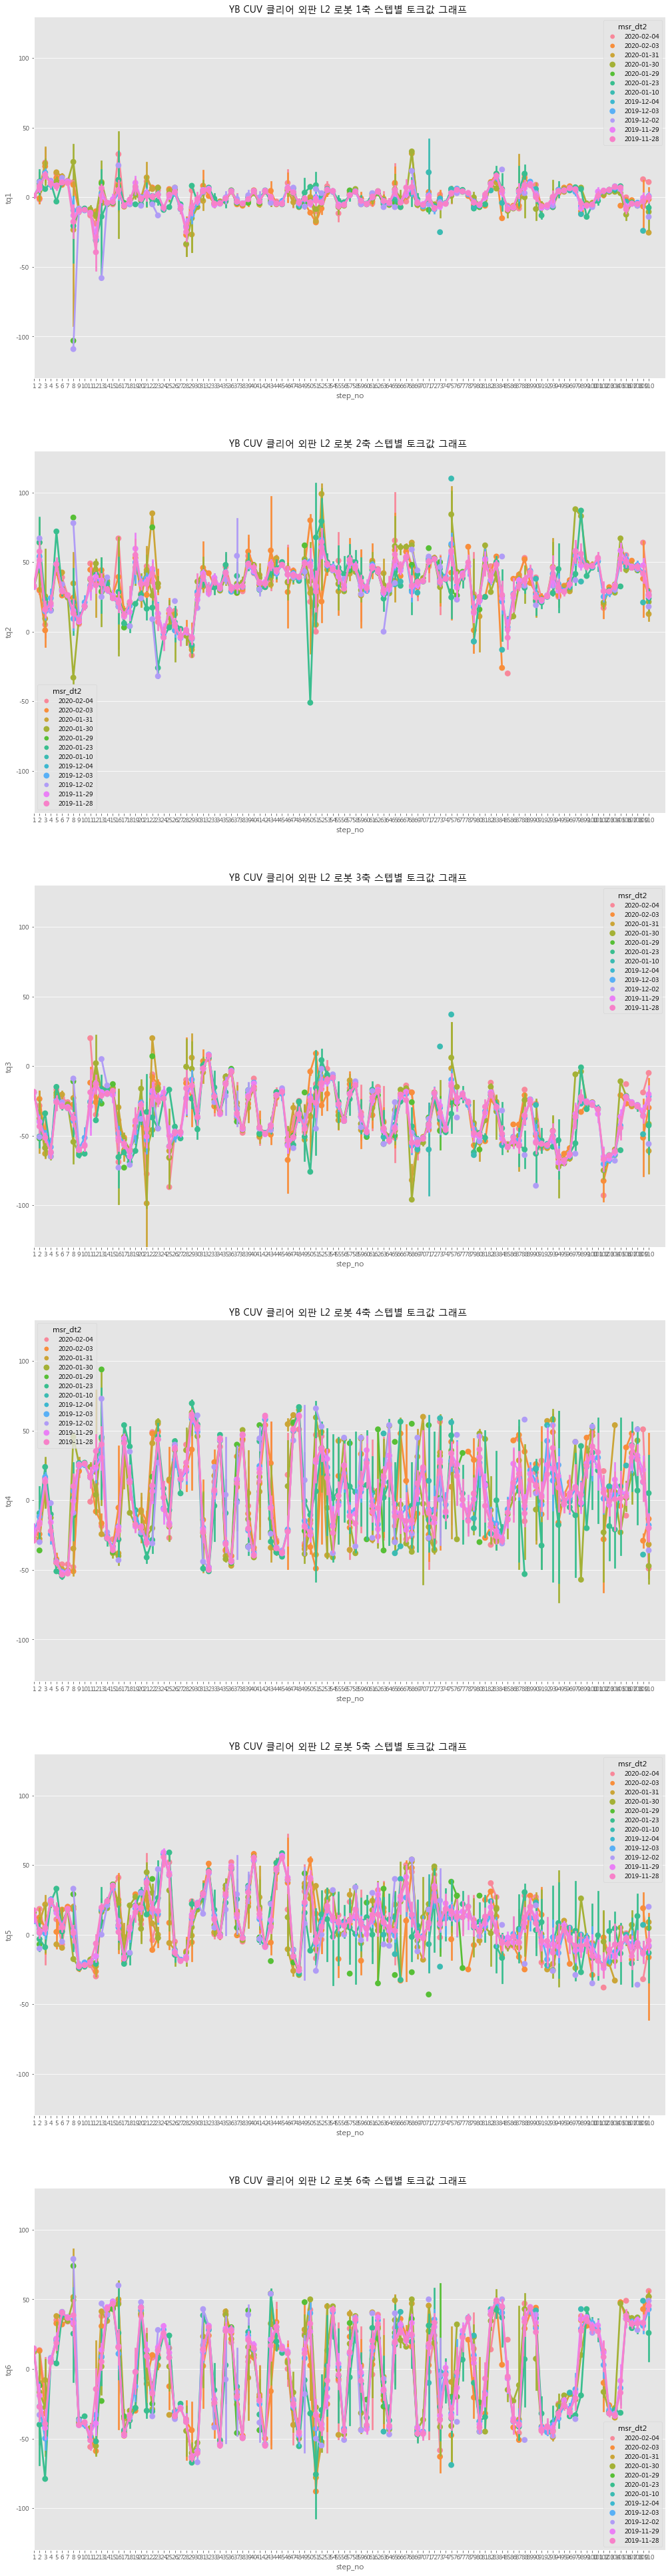

In [19]:
fig,(ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6,1)
fig.set_size_inches(17,70)

sns.pointplot(data = df_cuv, x='step_no', y='tq1', hue='msr_dt2',ax=ax1)
ax1.set_xlim(0,112)
ax1.set_ylim(-130,130)
ax1.set(title = 'YB CUV 클리어 외판 L2 로봇 1축 스텝별 토크값 그래프 ')

sns.pointplot(data = df_cuv, x='step_no', y='tq2', hue='msr_dt2',ax=ax2)
ax2.set_xlim(0,112)
ax2.set_ylim(-130,130)
ax2.set(title = 'YB CUV 클리어 외판 L2 로봇 2축 스텝별 토크값 그래프 ')

sns.pointplot(data = df_cuv, x='step_no', y='tq3', hue='msr_dt2',ax=ax3)
ax3.set_xlim(0,112)
ax3.set_ylim(-130,130)
ax3.set(title = 'YB CUV 클리어 외판 L2 로봇 3축 스텝별 토크값 그래프 ')

sns.pointplot(data = df_cuv, x='step_no', y='tq4', hue='msr_dt2',ax=ax4)
ax4.set_xlim(0,112)
ax4.set_ylim(-130,130)
ax4.set(title = 'YB CUV 클리어 외판 L2 로봇 4축 스텝별 토크값 그래프 ')

sns.pointplot(data = df_cuv, x='step_no', y='tq5', hue='msr_dt2',ax=ax5)
ax5.set_xlim(0,112)
ax5.set_ylim(-130,130)
ax5.set(title = 'YB CUV 클리어 외판 L2 로봇 5축 스텝별 토크값 그래프 ')

sns.pointplot(data = df_cuv, x='step_no', y='tq6', hue='msr_dt2',ax=ax6)
ax6.set_xlim(0,112)
ax6.set_ylim(-130,130)
ax6.set(title = 'YB CUV 클리어 외판 L2 로봇 6축 스텝별 토크값 그래프 ')

In [20]:
df_yb.columns

Index(['msr_dt', 'shop_cd', 'booth_id', 'zone_id', 'robot_id', 'tq1', 'tq2',
       'tq3', 'tq4', 'tq5', 'tq6', 'job_nm', 'line_no', 'step_no', 'inst_dt',
       'msr_dt2'],
      dtype='object')

In [21]:
df_yb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13511 entries, 0 to 13510
Data columns (total 16 columns):
msr_dt      13511 non-null datetime64[ns]
shop_cd     13511 non-null object
booth_id    13511 non-null int64
zone_id     13511 non-null int64
robot_id    13511 non-null int64
tq1         13511 non-null int64
tq2         13511 non-null int64
tq3         13511 non-null int64
tq4         13511 non-null int64
tq5         13511 non-null int64
tq6         13511 non-null int64
job_nm      13511 non-null object
line_no     13511 non-null int64
step_no     13511 non-null int64
inst_dt     13511 non-null object
msr_dt2     13511 non-null object
dtypes: datetime64[ns](1), int64(11), object(4)
memory usage: 1.6+ MB


In [22]:
tq1_max = 0
tq1_min = 0
df_tq1_total = pd.DataFrame()

for i in range(df_yb['step_no'].max()+1):
    df_i = df_yb[df_yb['step_no'] == i].copy()
    tq1_max = df_i['tq1'].max()
    tq1_min = df_i['tq1'].min()
        
    df_tq1_i30over = df_i[df_i['tq1'] >= tq1_max * 0.7]
    df_tq1_i30under = df_i[df_i['tq1'] <= tq1_min * 0.3]
    df_tq1 = pd.concat([df_tq1_i30over,df_tq1_i30under])
    df_tq1_total = pd.concat([df_tq1_total,df_tq1])
    
df_tq1_total = df_tq1_total.reset_index(drop=True)
df_tq1_short = df_tq1_total[['msr_dt','tq1','step_no','msr_dt2']]
df_tq1_short.to_csv('df_tq1.csv')
    
tq2_max = 0
tq2_min = 0
df_tq2_total = pd.DataFrame()

for i in range(df_yb['step_no'].max()+1):
    df_i = df_yb[df_yb['step_no'] == i].copy()
    tq2_max = df_i['tq2'].max()
    tq2_min = df_i['tq2'].min()
        
    df_tq2_i30over = df_i[df_i['tq2'] >= tq2_max * 0.7]
    df_tq2_i30under = df_i[df_i['tq2'] <= tq2_min * 0.3]
    df_tq2 = pd.concat([df_tq2_i30over,df_tq2_i30under])
    df_tq2_total = pd.concat([df_tq2_total,df_tq2])

df_tq2_total = df_tq2_total.reset_index(drop=True)
df_tq2_short = df_tq2_total[['msr_dt','tq2','step_no','msr_dt2']]
df_tq2_short.to_csv('df_tq2.csv')

tq3_max = 0
tq3_min = 0
df_tq3_total = pd.DataFrame()

for i in range(df_yb['step_no'].max()+1):
    df_i = df_yb[df_yb['step_no'] == i].copy()
    tq3_max = df_i['tq3'].max()
    tq3_min = df_i['tq3'].min()
        
    df_tq3_i30over = df_i[df_i['tq3'] >= tq3_max * 0.7]
    df_tq3_i30under = df_i[df_i['tq3'] <= tq3_min * 0.3]
    df_tq3 = pd.concat([df_tq3_i30over,df_tq3_i30under])
    df_tq3_total = pd.concat([df_tq3_total,df_tq3])

df_tq3_total = df_tq3_total.reset_index(drop=True)
df_tq3_short = df_tq3_total[['msr_dt','tq3','step_no','msr_dt2']]
df_tq3_short.to_csv('df_tq3.csv')
    
tq4_max = 0
tq4_min = 0
df_tq4_total = pd.DataFrame()

for i in range(df_yb['step_no'].max()+1):
    df_i = df_yb[df_yb['step_no'] == i].copy()
    tq4_max = df_i['tq4'].max()
    tq4_min = df_i['tq4'].min()
        
    df_tq4_i30over = df_i[df_i['tq4'] >= tq4_max * 0.7]
    df_tq4_i30under = df_i[df_i['tq4'] <= tq4_min * 0.3]
    df_tq4 = pd.concat([df_tq4_i30over,df_tq4_i30under])
    df_tq4_total = pd.concat([df_tq4_total,df_tq4])

df_tq4_total = df_tq4_total.reset_index(drop=True)
df_tq4_short = df_tq4_total[['msr_dt','tq4','step_no','msr_dt2']]
df_tq4_short.to_csv('df_tq4.csv')

tq5_max = 0
tq5_min = 0
df_tq5_total = pd.DataFrame()

for i in range(df_yb['step_no'].max()+1):
    df_i = df_yb[df_yb['step_no'] == i].copy()
    tq5_max = df_i['tq5'].max()
    tq5_min = df_i['tq5'].min()
        
    df_tq5_i30over = df_i[df_i['tq5'] >= tq5_max * 0.7]
    df_tq5_i30under = df_i[df_i['tq5'] <= tq5_min * 0.3]
    df_tq5 = pd.concat([df_tq5_i30over,df_tq5_i30under])
    df_tq5_total = pd.concat([df_tq5_total,df_tq5])
    
df_tq5_total = df_tq5_total.reset_index(drop=True)
df_tq5_short = df_tq5_total[['msr_dt','tq5','step_no','msr_dt2']]
df_tq5_short.to_csv('df_tq5.csv')

tq6_max = 0
tq6_min = 0
df_tq6_total = pd.DataFrame()

for i in range(df_yb['step_no'].max()+1):
    df_i = df_yb[df_yb['step_no'] == i].copy()
    tq6_max = df_i['tq4'].max()
    tq6_min = df_i['tq4'].min()
        
    df_tq6_i30over = df_i[df_i['tq6'] >= tq6_max * 0.7]
    df_tq6_i30under = df_i[df_i['tq6'] <= tq6_min * 0.3]
    df_tq6 = pd.concat([df_tq6_i30over,df_tq6_i30under])
    df_tq6_total = pd.concat([df_tq6_total,df_tq6])
    
df_tq6_total = df_tq6_total.reset_index(drop=True)
df_tq6_short = df_tq6_total[['msr_dt','tq6','step_no','msr_dt2']]
df_tq6_short.to_csv('df_tq6.csv')

In [23]:
df_tq3_total

msr_dt  shop_cd  booth_id  zone_id  robot_id  tq1  tq2  \
0     2020-02-03 11:11:19  KV121PA         1        3        11    1   33   
1     2020-01-29 19:58:28  KV121PA         1        3        11    1   32   
2     2020-01-10 11:10:02  KV121PA         1        3        11    0   33   
3     2019-12-03 07:20:00  KV121PA         1        3        11    1   32   
4     2019-12-02 11:54:54  KV121PA         1        3        11    0   34   
...                   ...      ...       ...      ...       ...  ...  ...   
10697 2019-11-28 12:58:58  KV121PA         1        3        11  -23   11   
10698 2019-11-28 12:57:35  KV121PA         1        3        11   -9   27   
10699 2019-11-28 12:49:16  KV121PA         1        3        11  -10   23   
10700 2019-11-28 09:59:00  KV121PA         1        3        11  -16   17   
10701 2019-11-28 09:57:37  KV121PA         1        3        11    9   36   

       tq3  tq4  tq5  tq6   job_nm  line_no  step_no                inst_dt  \
0      -18  -31   20   14  YB-CL2A        1        1  2020-02-03 11:13:08.0   
1      -19  -26   16   13  YB-CL2A        1        1  2020-01-29 20:00:15.0   
2      -18  -30   19   13  YB-CL2A        1        1  2020-01-10 11:11:40.0   
3      -19  -26   16   15  YB-CL2A        1        1  2019-12-03 09:22:22.0   
4      -13  -24   13    8  YB-CL2A        1        1  2019-12-02 12:13:49.0   
...    ...  ...  ...  ...      ...      ...      ...                    ...   
10697  -74  -27    6   57  YB-CL2A      165      111  2019-11-28 20:00:42.0   
10698  -53  -38   22   49  YB-CL2A      165      111  2019-11-28 19:58:47.0   
10699  -54  -37   22   50  YB-CL2A      165      111  2019-11-28 19:44:46.0   
10700  -59  -38   17   59  YB-CL2A      165      111  2019-11-28 16:05:27.0   
10701  -24  -33   24   46  YB-CL2A      165      111  2019-11-28 16:03:27.0   

          msr_dt2  
0      2020-02-03  
1      2020-01-29  
2      2020-01-10  
3      2019-12-03  
4      2019-12-02  
...           ...  
10697  2019-11-28  
10698  2019-11-28  
10699  2019-11-28  
10700  2019-11-28  
10701  2019-11-28  

[10702 rows x 16 columns]

In [24]:
df_tq4_total

msr_dt  shop_cd  booth_id  zone_id  robot_id  tq1  tq2  \
0     2020-02-03 11:11:19  KV121PA         1        3        11    1   33   
1     2020-01-29 19:58:28  KV121PA         1        3        11    1   32   
2     2020-01-10 11:10:02  KV121PA         1        3        11    0   33   
3     2019-12-03 07:20:00  KV121PA         1        3        11    1   32   
4     2019-12-02 11:54:54  KV121PA         1        3        11    0   34   
...                   ...      ...       ...      ...       ...  ...  ...   
10630 2019-11-28 09:59:00  KV121PA         1        3        11  -16   17   
10631 2019-11-28 09:57:37  KV121PA         1        3        11    9   36   
10632 2019-11-28 09:56:14  KV121PA         1        3        11    8   32   
10633 2019-11-28 09:54:51  KV121PA         1        3        11    9   34   
10634 2019-11-28 09:53:28  KV121PA         1        3        11    8   33   

       tq3  tq4  tq5  tq6   job_nm  line_no  step_no                inst_dt  \
0      -18  -31   20   14  YB-CL2A        1        1  2020-02-03 11:13:08.0   
1      -19  -26   16   13  YB-CL2A        1        1  2020-01-29 20:00:15.0   
2      -18  -30   19   13  YB-CL2A        1        1  2020-01-10 11:11:40.0   
3      -19  -26   16   15  YB-CL2A        1        1  2019-12-03 09:22:22.0   
4      -13  -24   13    8  YB-CL2A        1        1  2019-12-02 12:13:49.0   
...    ...  ...  ...  ...      ...      ...      ...                    ...   
10630  -59  -38   17   59  YB-CL2A      165      111  2019-11-28 16:05:27.0   
10631  -24  -33   24   46  YB-CL2A      165      111  2019-11-28 16:03:27.0   
10632   -7  -63   -4   54  YB-CL2A      165      111  2019-11-28 16:01:41.0   
10633  -13  -62   -3   55  YB-CL2A      165      111  2019-11-28 15:59:45.0   
10634  -12  -55   -5   56  YB-CL2A      165      111  2019-11-28 15:57:52.0   

          msr_dt2  
0      2020-02-03  
1      2020-01-29  
2      2020-01-10  
3      2019-12-03  
4      2019-12-02  
...           ...  
10630  2019-11-28  
10631  2019-11-28  
10632  2019-11-28  
10633  2019-11-28  
10634  2019-11-28  

[10635 rows x 16 columns]

[Text(0.5, 1.0, 'YB 클리어 외판 L2 로봇 4축 스텝별 토크값 그래프')]

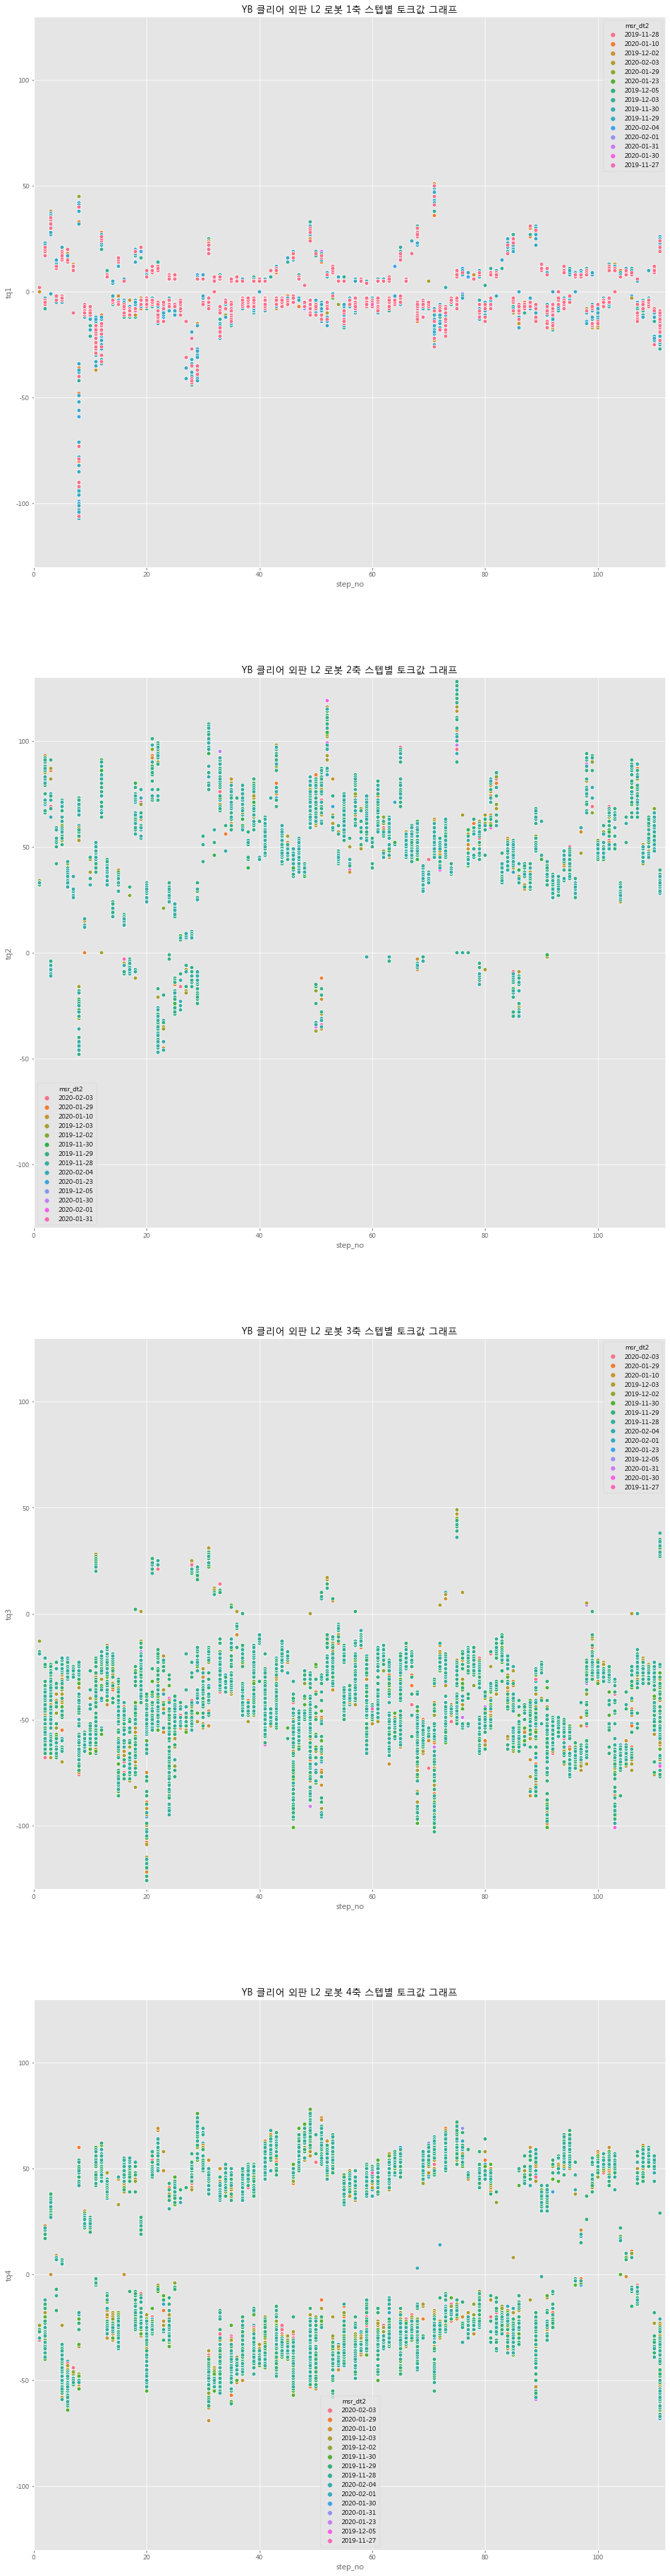

In [25]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1)
fig.set_size_inches(17,70)

sns.scatterplot(data = df_tq1_total, x='step_no', y='tq1', hue='msr_dt2',ax=ax1)
ax1.set_xlim(0,112)
ax1.set_ylim(-130,130)
ax1.set(title = 'YB 클리어 외판 L2 로봇 1축 스텝별 토크값 그래프')

sns.scatterplot(data = df_tq2_total, x='step_no', y='tq2', hue='msr_dt2',ax=ax2)
ax2.set_xlim(0,112)
ax2.set_ylim(-130,130)
ax2.set(title = 'YB 클리어 외판 L2 로봇 2축 스텝별 토크값 그래프')

sns.scatterplot(data = df_tq3_total, x='step_no', y='tq3', hue='msr_dt2',ax=ax3)
ax3.set_xlim(0,112)
ax3.set_ylim(-130,130)
ax3.set(title = 'YB 클리어 외판 L2 로봇 3축 스텝별 토크값 그래프')

sns.scatterplot(data = df_tq4_total, x='step_no', y='tq4', hue='msr_dt2',ax=ax4)
ax4.set_xlim(0,112)
ax4.set_ylim(-130,130)
ax4.set(title = 'YB 클리어 외판 L2 로봇 4축 스텝별 토크값 그래프')